## MIS373 - Advanced AI For Business - Assignment 1

**Student Name:** Siddhant Kohli

**Student ID:** 222181609

## Table of Content
   
## Table of Content

1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary


As a leading provider of social analytics solutions, the firm specializes in extracting valuable insights from social media data to support informed business decisions. In response to a executive manager’s request, I  was tasked with analyzing a dataset of tweets extracted from Twitter, and answering businsses question.
The primary objective of this project was to gain a comprehensive understanding of the ChatGPT community, and assess the level of interest surrounding the topic, and explore the various ways in which ChatGPT is being utilized nowadays.

In the data exploration section 2, I analyzed various metrics to gain insights into user activity, popular hashtags, and the most retweeted tweets. This comprehensive analysis enabled me to unthread the trends, and identify influential users, and understand the dynamics of engagement.

In section 3 of Sentiment analysis,  The sentiments of three firms OpenAI , Google and Microsoft were analysed using lexicon sentiment analysis approach to gain insight that what are people’s sentiments towards these firms.

In section 4 my analysis focused on employing the Latent Dirichlet Allocation (LDA) model to uncover and examine the main topics of discussion and concerns among users. Through this model, I experimented with a certain number of topics that emerged from the tweets. After conducting this analysis, I gained valuable insights into the appropriate themes and issues being discussed within the community.

<a id = "cell_exploration"></a>
### 2. Data Exploration

To begin with data exploration I explored the interesting variables like Like count , Languages and also explored the day the tweets were posted.
Exploration found that on average ***Tamil*** language got the most likes on average with each tweet getting  **72** likes on average followed by the ***Persian*** with **13** likes on average and ***English*** with  11 likes on average, We can conclude that the 64% of the tweets were in English language.
Analyzing the dates the tweets were posted on 22nd , 23rd and 24th January 2023 with *** 31700 or 63.3% tweets were posted on 23rd of January 2023.***

To align with the objective of the firm I analyzed that:-

A):- Top 5  most hashtags which were used besides chatgpt were **ai** with 2633 , openai  with 1127 , artificialintelligence with 730 , microsoft               at 530 and technology with count of 310 in total.
*(Rest 5 in analysis)*

B):-  The firm wanted to know who are the most active users who posted the most tweets about chat gpt. I found out that most active user was
**translation_ja** who posted 60 tweets followed by SaveToNotion with 47 tweets , trandanhmmo with 44 tweets , richardkimphd with 43 tweets and rest repectively

VeilleCyber3  -38 , mitstek - 33 ,
ChatGPTSpecial -33 ,
infoitscienza  -31 ,
jimkaskade   -  31 and
ArtilNews -30

C):- The organization has articulated specific interest in tweets with most retweet counts, after conducting a thorough  analysis I found out the top most 6 retweeted tweets were about how chatgpt has remarkable performance and unprecedented victory in passing painstaking exams like Wharton MBA, United States Medical Licensing Examination (USMLE) and even the bar exam. Additionally, the announcement of a substantial investment deal between OpenAI and Microsoft shows the significance of ChatGPT's capabilities and its potential implications for fields like education and knowledge work. While some praise the chatgpt’s capabilities some raise concerns of current education system, Tweets also highlighted how chatgpt writes mediocre undergrad humanities exams and does better in MBA level exams. It questions the system and loop holes in entrance examinations and undergrad level examinations.

In [ ]:
#Important libraries for our project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize
from collections import Counter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
!pip install wordcloud
from matplotlib import pyplot
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import math
import nltk
from nltk.tokenize import word_tokenize
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#
#This only needs to run once to install Gensim package
#Make sure that your computer is connected to the Internet
!pip install Cython
!pip install gensim

In [ ]:
data = pd.read_csv('/content/chatGPT-Twitter.csv')
data.head(1)

,Datetime,Tweet Id,Text,Username,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,Language,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1.620000e+18,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,NaN,1,0,5,0,ja,NaN,NaN,NaN,[],0


In [ ]:
data.drop(columns =['Tweet Id' ,'MentionedUsers', 'QuotedTweet' , 'Media' , 'QuoteCount'] , inplace = True)

In [ ]:
#Additional analysis
language_data = data.groupby('Language')[['LikeCount']].mean().reset_index()
language_data_sorted = language_data.sort_values(by='LikeCount' , ascending = False)
language_data_sorted.head(4).drop(labels= language_data_sorted.index[2])

,Language,LikeCount
50,ta,72.666667
14,fa,13.106952
10,en,11.430696


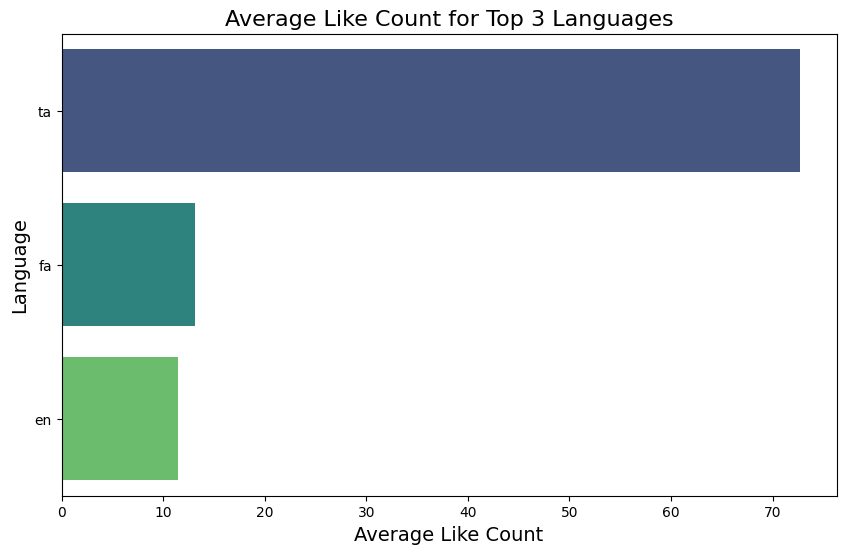

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='LikeCount', y='Language', data=language_data_sorted.head(4).drop(labels= language_data_sorted.index[2]) , palette='viridis')
plt.title('Average Like Count for Top 3 Languages', fontsize=16)
plt.xlabel('Average Like Count', fontsize=14)
plt.ylabel('Language', fontsize=14)
plt.show()

In [ ]:
data.Datetime = pd.to_datetime(data.Datetime)
data['day'] = data['Datetime'].dt.date
data['day'].value_counts()

day
2023-01-23    31700
2023-01-22    10068
2023-01-24     8233
Name: count, dtype: int64

In [ ]:
tweet_by_day = data.groupby(["day"])["Text"].count().reset_index()
tweet_by_day.columns = ["day","count"]

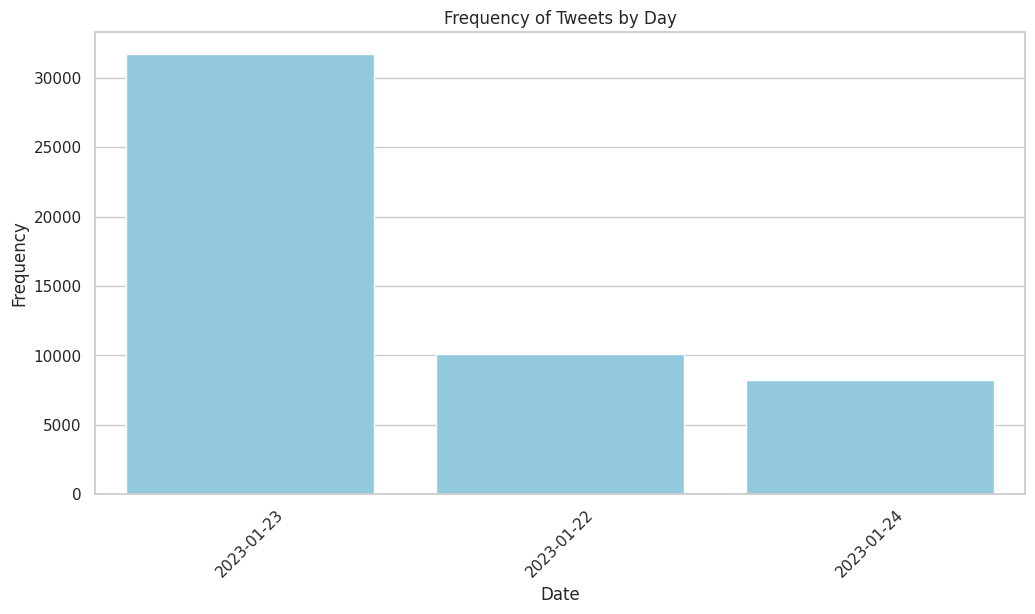

In [ ]:
#Visualizing tweet counts by day
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=data['day'].value_counts().index, y=data['day'].value_counts().values, color = 'skyblue')
plt.title('Frequency of Tweets by Day')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
##Necessary data cleaning
data['hashtag'] = data['hashtag'].str.lower() #Lowering the text is called normalisation in data preprocessing step
data['Text'] = data['Text'].str.lower()
data.head(2)

,Datetime,Text,Username,CountLinks,ReplyCount,RetweetCount,LikeCount,Language,hashtag,hastag_counts,day
0,2023-01-22 13:44:34+00:00,chatgptで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,NaN,1,0,5,ja,[],0,2023-01-22
1,2023-01-22 13:44:39+00:00,@alexandrovnaing prohibition of chatgpt has be...,Caput_LupinumSG,NaN,1,0,5,en,[],0,2023-01-22


In [ ]:
#Question A
hashtags = data['hashtag'].str.findall(r'#(\w+)').explode() #Now explode will seprate the hashtags and let us count them
top_10_frequency = hashtags.value_counts().head(20)
top_10_hashtags = top_10_frequency.iloc[1:12].drop(labels=top_10_frequency.index[7]) # hashtag ia has been dropped since it was mispelled of ai
top_10_hashtags

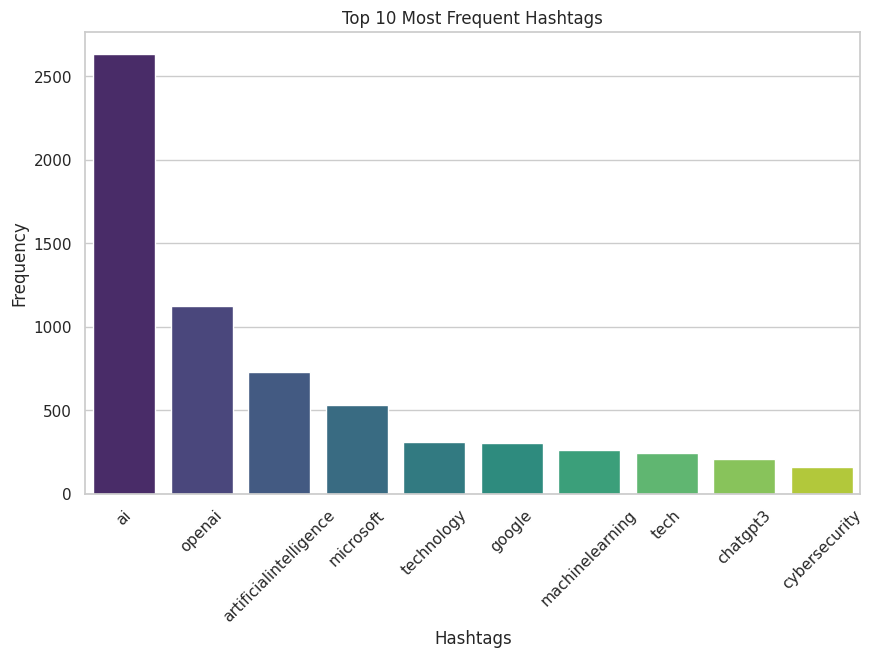

In [ ]:
#Visualising the top 10 hashtags
plt.figure(figsize=(10, 6))
sns.barplot(x= top_10_hashtags.index, y= top_10_hashtags.values, palette="viridis")
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Hashtags')
plt.xticks(rotation= 45)

plt.show()

In [ ]:
#Question B
most_active_users = data.groupby('Username')['Text'].count().reset_index()
most_active_users.columns = ['Username', 'TweetCount']
most_active_users = most_active_users.sort_values(by='TweetCount', ascending=False)
print(most_active_users.head(10))

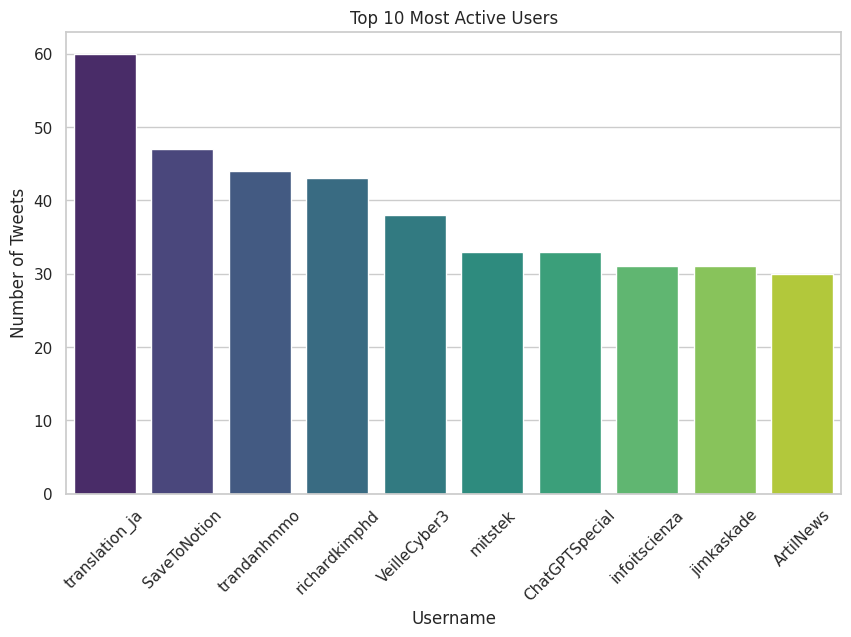

In [ ]:
#Visualizing the Most active users
plt.figure(figsize=(10, 6))
sns.barplot(x='Username', y='TweetCount', data=most_active_users.head(10), palette='viridis')
plt.title('Top 10 Most Active Users')
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Question C
most_retweets =  data.sort_values( by = "RetweetCount", ascending = False).head(7)
most_english_retweets = most_retweets.query('Language == "en"' )
pd.set_option('display.max_colwidth', None)
most_english_retweets[['Text', 'RetweetCount']].reset_index()

,index,Text,RetweetCount
0,399,chatgpt passed a wharton mba exam. \n\ntime to overhaul education.,6815
1,2855,"pretty absurd that chatgpt has passed the united states medical licensing examination (usmle). \n\ntoday, it takes 4 years of med school and 2+ years of clinical rotations to pass. it tests ambiguous scenarios &amp; closely-related differential diagnoses\n\nhttps://t.co/ogdkxhenut",2627
2,14314,"chatgpt, an artificial intelligence search tool, has passed the united states medical licensing exam. https://t.co/sk639ih6pr",2463
3,25137,"just in: chatgpt creator openai signs multi-year, multi-billion investment deal with microsoft $msft.",2203
4,44851,chatgpt has passed:\n\n- united states medical license exam\n\n- the bar exam\n\n- mba operations exam \n\nknowledge workers should be very worried,2082
5,11134,the fact that chatgpt writes strange and mediocre undergraduate humanities papers but fantastic elite mba exams suggests it may not have the same implications for every kind of education https://t.co/6miaepzcdu,1874


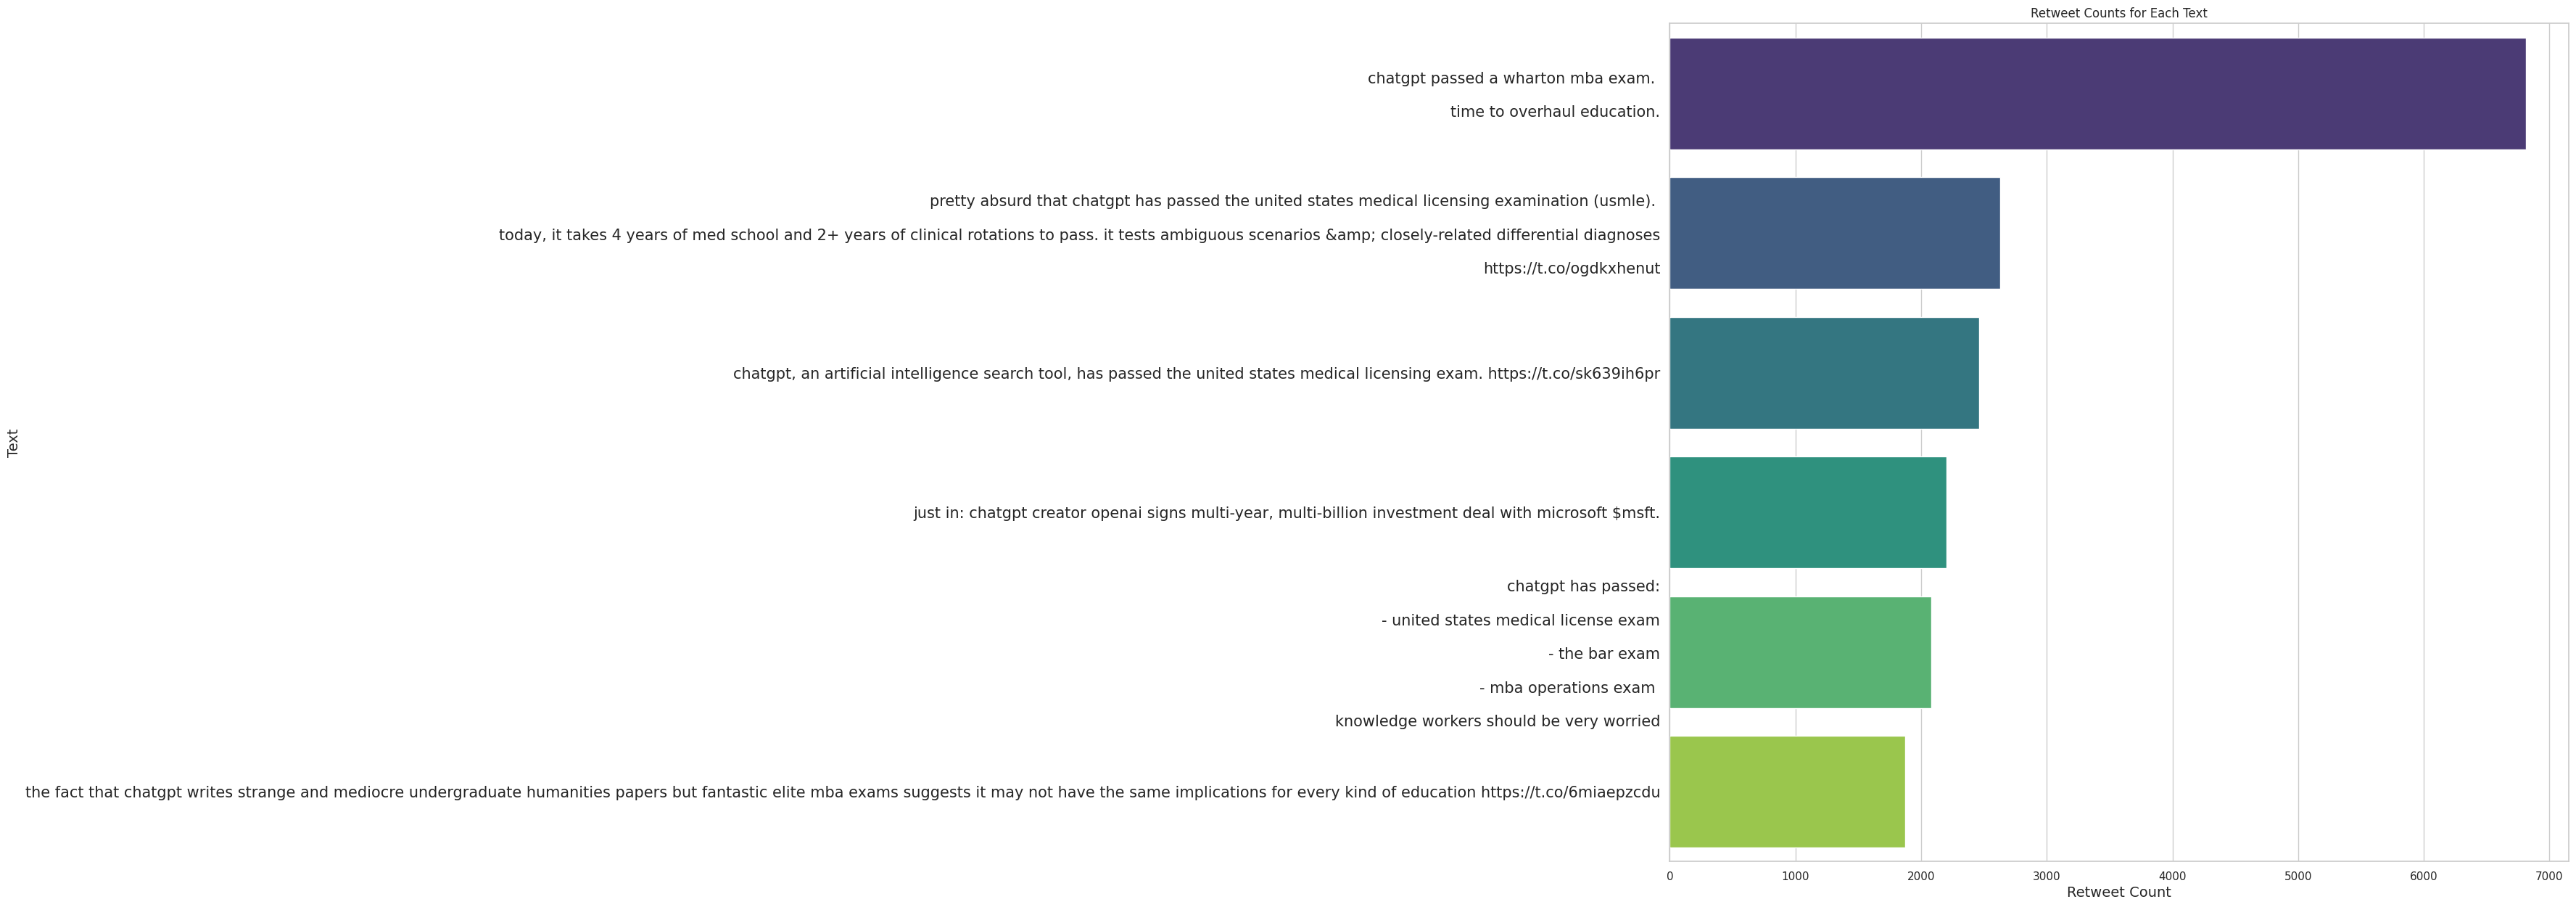

In [ ]:
#Visualizing the most retweeted tweets
most_retweets_data= pd.DataFrame(most_english_retweets)
most_retweets_data= pd.DataFrame(most_english_retweets)
plt.figure(figsize=(16, 15))
sns.barplot(x='RetweetCount', y='Text', data= most_retweets_data, palette='viridis')
plt.xlabel('Retweet Count' , fontsize = 14)
plt.ylabel('Text' , fontsize = 14)
plt.title('Retweet Counts for Each Text')
plt.yticks(fontsize= 15)

plt.show()

<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis

 The boom of OpenAI and Chatgpt triggered a concern among the firm stakeholders as they wanted know the what people think about Google Microfsoft and OpenAI. The exploration led to answer as I found out that OpenAI was most popular among tweeters with **61%** of tweets about OpenAI followed by Google and Microsoft. On average OpenAI garnered  most positive feedbacks from users followed by Microsoft and google, Hence **OpenAI** had almost **46% of positive feedbacks** on average , followed closely by
Microsoft which had on average **41%** of positive feedback rate  and lastly google with concerning average of  only **40%** of positive feedbacks. These findings underscore the positive impact OpenAI has made compared to its counterparts, This significant disparity in positive feedback rates among three top entities shows the value OpenAI has in 2023 , with enhanced development of AI techs like DALL_E and CLIP showcased its creativity among tech users. *(The Year in Review: 2023’S Most Notable in Tech from OpenAI, Microsoft, and Google, n.d.)*

In [ ]:
#Code cell
#For this we have to use only tweets written in english
english_data = data.query("Language == 'en'")
english_data.head(2)

,Datetime,Text,Username,CountLinks,ReplyCount,RetweetCount,LikeCount,Language,hashtag,hastag_counts,day
1,2023-01-22 13:44:39+00:00,@alexandrovnaing prohibition of chatgpt has been added to the honor code of my daughter’s school,Caput_LupinumSG,NaN,1,0,5,en,[],0,2023-01-22
3,2023-01-22 13:44:49+00:00,bow down to chatgpt 🫡..... https://t.co/entszi2aq9,Vishwasrisiri,['https://t.co/ENTSzi2AQ9'],0,0,2,en,[],0,2023-01-22


In [ ]:
#Essential Text pre processing before sentiment analysis including normalization and removing symbols and emojis from text

def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')
    ReviewText = ReviewText.str.replace(r'http\S+', '')
    ReviewText = ReviewText.str.replace('[^\w\s#@/:%.,_-]', '')
    return ReviewText
preprocess(english_data['Text']).head(2)

1    @alexandrovnaing prohibition of chatgpt has been added to the honor code of my daughter’s school
3                                                  bow down to chatgpt 🫡..... https://t.co/entszi2aq9
Name: Text, dtype: object

In [ ]:
def remove_emojis(text): #This code is to remove emojis from text ( Cleaning Code taken from ChatGPT)

    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    # Remove emojis from the text
    return emoji_pattern.sub(r'', text)

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

english_data['Text']  = english_data['Text'].apply(remove_emojis)

In [ ]:
sid = SentimentIntensityAnalyzer() #Initializing our sentiment analyzer

# Iterating over each tweet
for index, text in english_data['Text'].head(5).items():
    scores = sid.polarity_scores(text)

    print(f"Text {index}:\n{text}")
    print("Polarity Scores:", scores)
    print()

In [ ]:

sid = SentimentIntensityAnalyzer()

# Filtering the tweets containing mentions of the three companies (Part of Code taken from ChatGPT))
company_tweets = english_data[english_data['Text'].str.contains('openai|google|microsoft', case=False)]

sentiment_scores = {'openai': {'neutral': 0, 'positive': 0, 'negative': 0},
                    'google': {'neutral': 0, 'positive': 0, 'negative': 0},
                    'microsoft': {'neutral': 0, 'positive': 0, 'negative': 0}}

# Performing sentiment analysis on filtered tweets and updating sentiment scores
for index, text in company_tweets['Text'].items():
    # Calculate polarity scores for the text
    scores = sid.polarity_scores(text)

    # This loop will Determine the company mentioned in the text (Code taken from ChatGPT)
    if 'openai' in text.lower():
        if scores['compound'] > 0.05: #Threshold referenced from Medium article (Medium, 2018)
            sentiment_scores['openai']['positive'] += 1
        elif scores['compound'] < -0.05:
            sentiment_scores['openai']['negative'] += 1
        else:
            sentiment_scores['openai']['neutral'] += 1
    elif 'google' in text.lower():
        if scores['compound'] > 0.05:
            sentiment_scores['google']['positive'] += 1
        elif scores['compound'] < -0.05:
            sentiment_scores['google']['negative'] += 1
        else:
            sentiment_scores['google']['neutral'] += 1
    elif 'microsoft' in text.lower():
        if scores['compound'] > 0.05:
            sentiment_scores['microsoft']['positive'] += 1
        elif scores['compound'] < -0.05:
            sentiment_scores['microsoft']['negative'] += 1
        else:
            sentiment_scores['microsoft']['neutral'] += 1

for company, scores in sentiment_scores.items():
    print(f"Sentiment counts for {company}:")
    print(f"Neutral: {scores['neutral']}")
    print(f"Positive: {scores['positive']}")
    print(f"Negative: {scores['negative']}")
    print(f"Total number of scores recieved: {sum(scores.values())}")
    print()

Sentiment counts for openai:
Neutral: 1580
Positive: 1604
Negative: 385
Total number of scores recieved: 3569

Sentiment counts for google:
Neutral: 522
Positive: 618
Negative: 444
Total number of scores recieved: 1584

Sentiment counts for microsoft:
Neutral: 326
Positive: 278
Negative: 82
Total number of scores recieved: 686



In [ ]:
#Average compund score of each company
sentiment_scores = {'openai': [], 'google': [], 'microsoft': []}

# Perform sentiment analysis on filtered tweets
for index, text in company_tweets['Text'].items():
    # Calculate polarity scores for the text
    scores = sid.polarity_scores(text)

    # Determine the company mentioned in the text
    if 'openai' in text.lower():
        sentiment_scores['openai'].append(scores['compound'])
    elif 'google' in text.lower():
        sentiment_scores['google'].append(scores['compound'])
    elif 'microsoft' in text.lower():
        sentiment_scores['microsoft'].append(scores['compound'])

# Calculate average sentiment score for each company
average_scores = {company: sum(scores) / len(scores) if scores else None for company, scores in sentiment_scores.items()}

# Print average sentiment scores for each company
for company, score in average_scores.items():
    print(f"Average sentiment score for {company}: {score}")



Average sentiment score for openai: 0.1812624544690393
Average sentiment score for google: 0.06594993686868676
Average sentiment score for microsoft: 0.11643688046647219


In [ ]:
#(Code taken from CHATGPT)
positive_counts = {company: sum(1 for score in scores if score > 0) for company, scores in sentiment_scores.items()}
total_counts = {company: len(scores) for company, scores in sentiment_scores.items()}

positive_proportions = {company: positive_counts[company] / total_counts[company] if total_counts[company] != 0 else 0 for company in sentiment_scores.keys()}

# Printing proportion of positive sentiments for each company
for company, proportion in positive_proportions.items():
    print(f"Proportion of positive sentiments for {company}: {proportion:.2f}")


Proportion of positive sentiments for openai: 0.46
Proportion of positive sentiments for google: 0.40
Proportion of positive sentiments for microsoft: 0.41


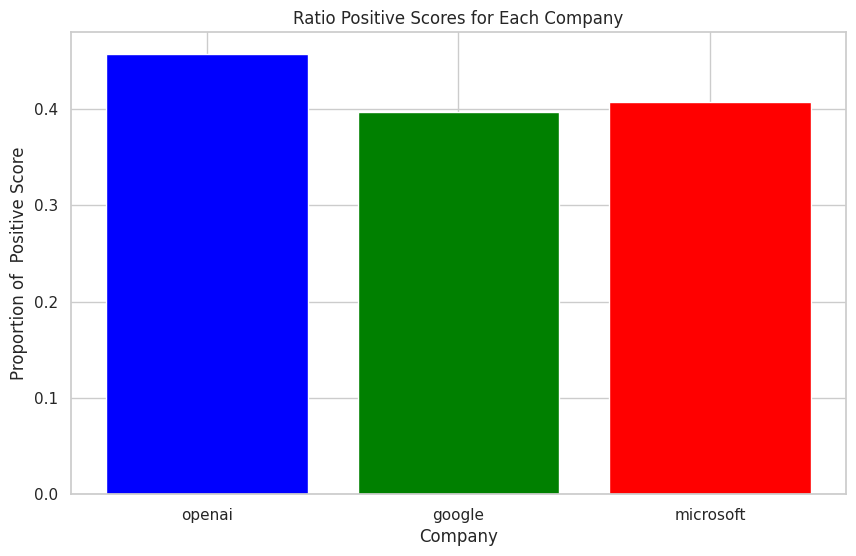

In [ ]:
#visualising  propotion of positive comments recieved by each comapny
plt.figure(figsize=(10, 6))
plt.bar(positive_proportions.keys(), positive_proportions.values(), color=['blue', 'green', 'red'])


plt.xlabel('Company')
plt.ylabel('Proportion of  Positive Score')
plt.title('Ratio Positive Scores for Each Company')


plt.show()

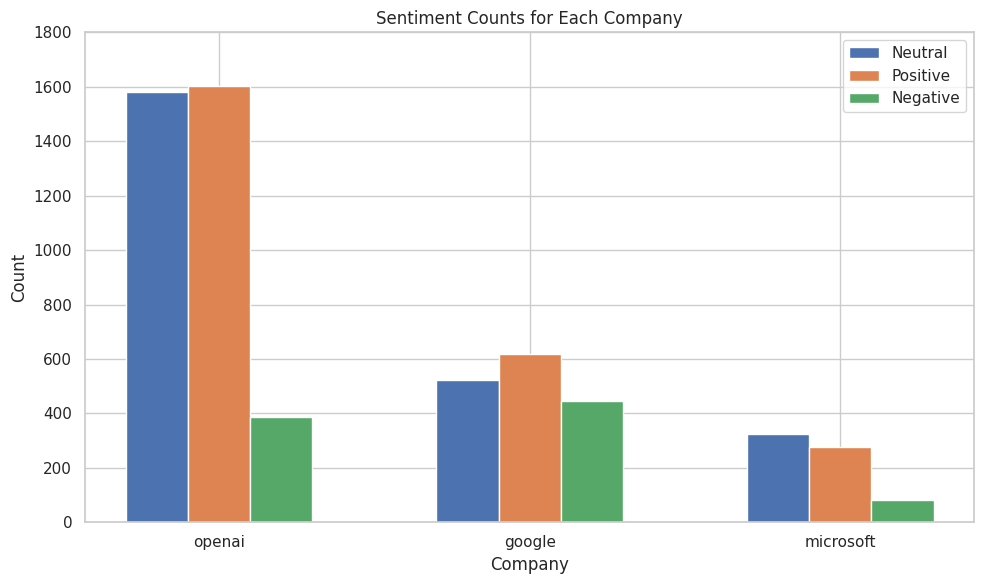

In [ ]:
# Sentiment counts data (Some part of code refrenced from Gemini)
companies = ['openai', 'google', 'microsoft']
sentiments = ['Neutral', 'Positive', 'Negative']
counts = [
    [1580, 1604, 385],  # Sentiment counts for openai
    [522, 618, 444],    # Sentiment counts for google
    [326, 278, 82]      # Sentiment counts for microsoft
]

plt.figure(figsize=(10, 6))

bar_width = 0.2
index = range(len(companies))

for i, sentiment in enumerate(sentiments):
    plt.bar([x + i * bar_width for x in index], [count[i] for count in counts], bar_width, label=sentiment)

plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Sentiment Counts for Each Company')
plt.xticks([idx + bar_width for idx in index], companies)
plt.legend()
plt.ylim(0, 1800)

plt.tight_layout()
plt.show()


<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

By Text analysis I gained deeper insight into the document and distinct topics were resonated the audience of interests. Dissecting these topics I extracted major topics which where most spreaded and highlighted among our tweets. Before we start with our topic modelling it is very essential  to clean the tweets as they contain diffrent symbols , emojis and links which can mislead our model following the analogy of ***Garbage in and Garbage
out***.
Important Text pre-processing techniques were done before fitting our LDA onto our data. Most important techniques like **Tokenization** and **Stemming** the Text are essential as they remove the unnecessary words and let us convert the data into sparse-matrix form which is one of the most important element of LDA.

After conducting a thorough experimentation and employing coherence algorithm to model the tweets, I have determined the most optimal number of topics. Through this process, I identified that 7 topics yielded the highest coherence score of 0.336. Consequently, we have selected 7 as the optimal number of topics for our analysis.

While analyzing the topics  I discovered that most probable topic was topic 5 which talked about discussions on coding practices , content creation and employment opportunities in the tech. Some topics like Topic 1 emphasized on business and use of chatgpt in enhancing the education system where it was questioned after how chatgpt passed rigorous  exams like Wharton MBA and USMLE. Topic 3 is an Interesting topic where Genevieve Roch-Decter (Grdecter) talked about search functionalities , human interaction with technology and reflecting thr imporatance of information gathering.

Three topics which I think are most important to me would be Topic 4 , 6 and 7.

**Topic 4:-** This topic is very relevant to me as being an analytics and data science student and having privileges of tools like Chatgpt , it becomes very easy to make or break a skillset with help of AI. As I can make my skills better with help of Chatgpt I can also break them by being a lazy learner. Proficiency in coding can open up opportunities for me as I can be creative and enhance my problem-solving skills and academia as well.
The art of querying Chatgpt effectively is a skill in itself. Crafting precise questions to extract meaningful responses requires deep strategic thinking.

**Topic 6:-** Being a university student work and education becomes a pivot of life in these days, As modern education is becoming more competitive , The fact that Chatgpt can pass exams like Bar and USMLE without special training. In these days Chatgpt and  other AI technologies Can Co-Author important researches in medical field is both concerning and a proud moment for the students and professors.*(AI Passes U.S. Medical Licensing Exam, 2023)*.

 Will AI take over students to be more practical and hands on ?  , In my opinion No , Because these AI techs only think around what they are fed upon (data), where as if used as an assert notable students , researchers and even professors can think beyond what we could'nt have imagined a couple of years ago.

 **Topic 7 :-**  This topic strikes my interest as it is about investing and technology, two interest topics I adore. As a student being informed about investing opportunities in emerging technologies can boost my career as a data analyst/scientist additionally understanding implementations of technologies in several economies can guide my career path to broaden and strengthen the skillset of chosen field of study.

 Overall these topics give a meaningful insight about Chatgpt in several areas like Education , Investments and Businesses, will it be a liability or an assert is highly subjective.

In [ ]:
#New dataframe for just LDA topic modelling
English_data = data.query("Language == 'en'")
English_data.head(2) #We will use English data for LDA

,Datetime,Text,Username,CountLinks,ReplyCount,RetweetCount,LikeCount,Language,hashtag,hastag_counts,day
1,2023-01-22 13:44:39+00:00,@alexandrovnaing prohibition of chatgpt has been added to the honor code of my daughter’s school,Caput_LupinumSG,NaN,1,0,5,en,[],0,2023-01-22
3,2023-01-22 13:44:49+00:00,bow down to chatgpt 🫡..... https://t.co/entszi2aq9,Vishwasrisiri,['https://t.co/ENTSzi2AQ9'],0,0,2,en,[],0,2023-01-22


In [ ]:
#Pre processing of
# Initialize Porter Stemmer
porter = PorterStemmer()

# Assuming 'data' is imported already and contains a column named 'Text'
documents = English_data['Text']
Cleaned_doc = []

for review in documents:
    try:
        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)
        # make all text lowercase
        review = review.lower()
        # apply tokenization
        Tokens = review.split()
        # apply stemming operation (Optional)
        #for t in range(len(Tokens)):
            #Tokens[t] = porter.stem(Tokens[t])
        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3]
        review = ' '.join(Filtered_token)
    except Exception as e:
        print("Error processing review:", e)
        continue
    # Save cleaned text
    Cleaned_doc.append(review)
    print('-[Review Text]: ', review)

In [ ]:
nltk.download('stopwords') #This program will remove the stopwords

stop_words = stopwords.words('english')


for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)
    print('-[Cleaned Text]: ', Cleaned_doc[r])

In [ ]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')

In [ ]:
# This code will Pos_tag our document which is a collection of tags
tagged_documents = []

# Iterate through each cleaned document
for doc in Cleaned_doc:
    # Tokenize the document
    tokens = word_tokenize(doc)

    # Perform POS tagging on the tokens
    tagged_tokens = nltk.pos_tag(tokens)

    # Append the tagged tokens to the list
    tagged_documents.append(tagged_tokens)

# Print the tagged documents (This part taken from Chatgpt)
for i, doc in enumerate(tagged_documents[:10]):
    print(f"Document {i+1} POS tagged:")
    print(doc)
    print()

In [ ]:
# Extracting only noun words from tagged documents
noun_words = [[token[0] for token in doc if token[1].startswith('NN')] for doc in tagged_documents]


for i, nouns in enumerate(noun_words[:10]):
    print(f"Document {i+1} Nouns:")
    print(nouns)
    print()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# This will Convert the list of words into a list of space-separated strings (documents)
documents = [' '.join(doc) for doc in noun_words]

vectorizer = CountVectorizer()


sparse_matrix = vectorizer.fit_transform(documents)

print("Shape of document-term sparse matrix:", sparse_matrix.shape)


Shape of document-term sparse matrix: (32076, 38519)


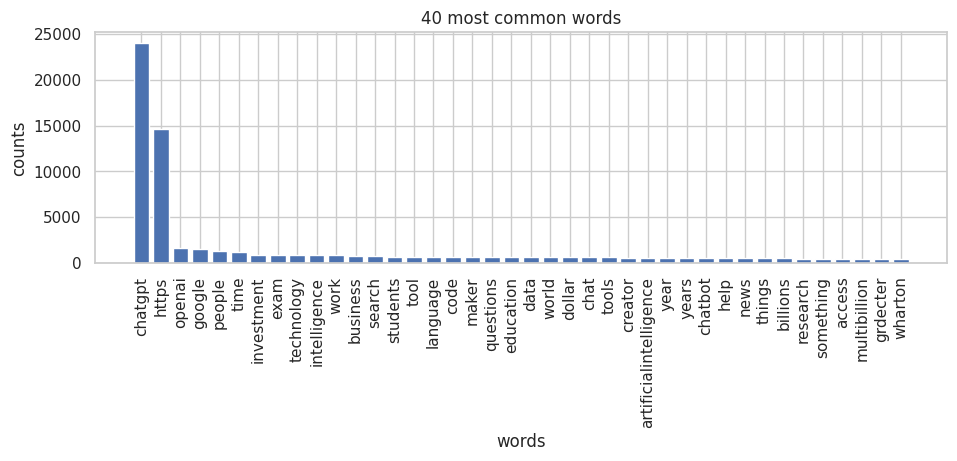

In [ ]:
terms = vectorizer.get_feature_names_out()

total_counts = np.zeros(len(terms))
for t in sparse_matrix:
    total_counts += t.toarray()[0]

count_dict = zip(terms, total_counts) #( This part refrenced from GitHub)
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[:40]  # Take the top 40 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

plt.figure(figsize=(11, 3))
plt.bar(words, counts)
plt.title('40 most common words')
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [ ]:
#Removing highly frequent (Greater than 20%) and infrequent words (less than 1%)
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 1000 and total_counts[t] > 50:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remaining term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = sparse_matrix[:,keepIndex]
ReducedCount

Number of Terms Remained:  554


<32076x554 sparse matrix of type '<class 'numpy.int64'>'
	with 85570 stored elements in Compressed Sparse Row format>

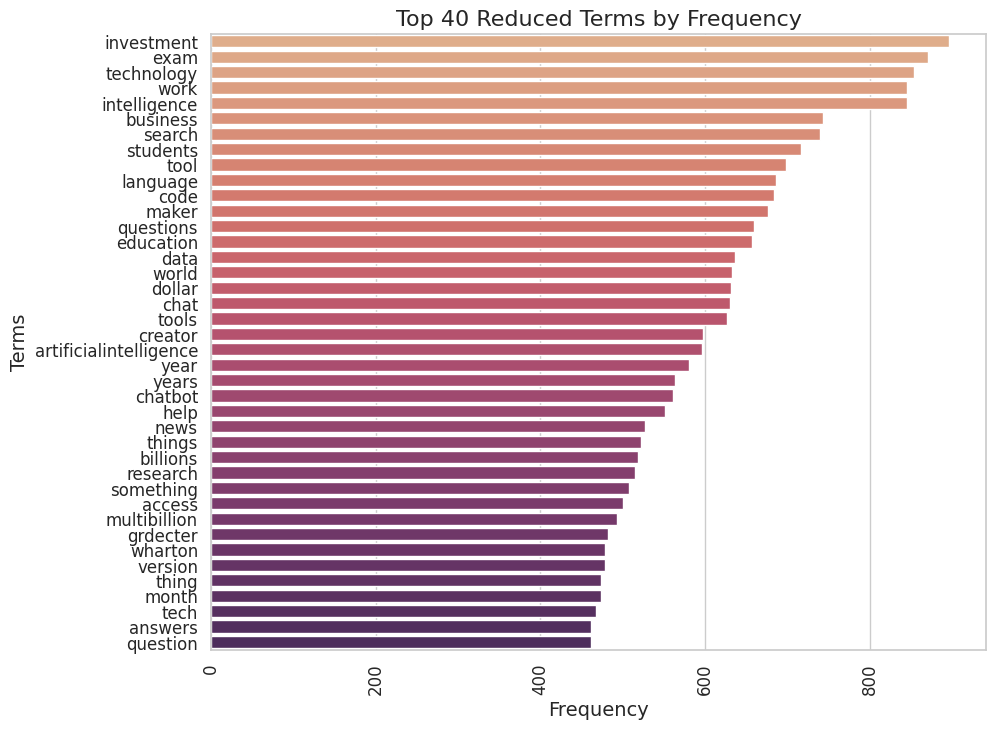

In [ ]:
# Get the frequencies of the reduced terms (This Code has been refrenced from ChatGPT with minor tweeks)
reduced_term_counts = np.asarray(ReducedCount.sum(axis=0)).reshape(-1)


sorted_indices = np.argsort(reduced_term_counts)[::-1]
top_indices = sorted_indices[:40]

top_terms = [ReducedTerm[i] for i in top_indices]
top_counts = [reduced_term_counts[i] for i in top_indices]


sns.set(style="whitegrid")


plt.figure(figsize=(10, 8))
sns.barplot(x=top_counts, y=top_terms, palette="flare")


plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Terms', fontsize=14)
plt.title('Top 40 Reduced Terms by Frequency', fontsize=16)


plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)


plt.show()

In [ ]:
#Experimentation with COHERENCE MODEL
Cleaned_doc_new = []
print('CLEANED TEXT NEW: ')
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keeping only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item)
    print(Cleaned_doc_new[r])

In [ ]:
import gensim.corpora as corpora

# Constructing term dictionary
id2word = corpora.Dictionary(Cleaned_doc_new)
print(id2word.token2id)

In [ ]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]
print(Corpus)

In [ ]:
#Training our model using bag of word reprentation,  experimentation has been done with 10 topics can be tweeked accordingly
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100)

pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

In [ ]:
from gensim.models import CoherenceModel

# Computing Coherence score
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=Cleaned_doc_new,
                                     dictionary=id2word,
                                     coherence='c_v')


coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.310649066600314


In [ ]:
#Evaluating the model with topics numbers from 2 to 9
Topics = list(range(2,10,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)

    Trained_Models.append(lda_model)

    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=Cleaned_doc_new,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()

    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Text(0, 0.5, 'Coherence')

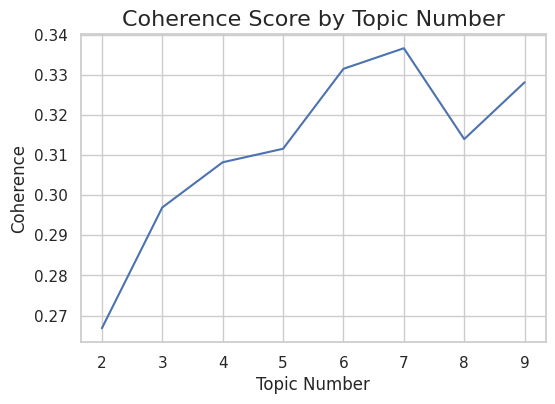

In [ ]:
#Plotting the Coherence iterations as we can see & is our optimal number of topics within iterations
pyplot.figure(figsize=(6,4))
pyplot.plot(coherence_scores)
pyplot.xticks(range(0,len(Topics)),Topics)
pyplot.title('Coherence Score by Topic Number', fontsize=16)
pyplot.xlabel('Topic Number')
pyplot.ylabel('Coherence')

In [ ]:
#LDA modelling
number_topics = 7

lda = LDA(n_components = number_topics, n_jobs = -1, random_state = 2023)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

In [ ]:
#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

In [ ]:
#Iterating on our LDA model
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))

In [ ]:
#Matrix showing probabilities of these words occuring in our 7 topics
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords

,ability,access,account,accuracy,adani,advantage,advice,alarm,alternatives,amount,...,write,writer,writers,writing,yeah,year,years,yesterday,york,youtube
0,0.000071,0.000011,0.000961,0.000011,0.006799,0.000440,0.000011,0.000011,0.000011,0.000011,...,0.000012,0.003146,0.000011,0.000980,0.000011,0.000011,0.000011,0.001255,0.001471,0.000011
1,0.000013,0.041707,0.000013,0.000013,0.000013,0.000013,0.009453,0.000013,0.000013,0.000013,...,0.000013,0.000013,0.000013,0.000013,0.006412,0.000013,0.000013,0.000065,0.003807,0.025725
2,0.002751,0.003112,0.000012,0.000012,0.000012,0.000856,0.000012,0.000012,0.000012,0.000081,...,0.000018,0.000012,0.008503,0.000012,0.000308,0.000012,0.000012,0.000851,0.000012,0.000012
3,0.000011,0.000011,0.000011,0.003841,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,...,0.011546,0.001226,0.000011,0.000011,0.001956,0.000012,0.045139,0.000011,0.000011,0.000011
4,0.008399,0.000009,0.003753,0.001544,0.000009,0.002021,0.000009,0.000009,0.000009,0.000009,...,0.000009,0.002058,0.000009,0.002434,0.000009,0.000009,0.000009,0.000083,0.000009,0.000009
5,0.002188,0.000011,0.000011,0.000011,0.000011,0.001128,0.000011,0.000011,0.000011,0.006276,...,0.000011,0.000011,0.000011,0.002325,0.000011,0.000011,0.000011,0.002228,0.000011,0.000011
6,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.006699,0.005168,0.000665,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.046823,0.000012,0.000012,0.000012,0.000012


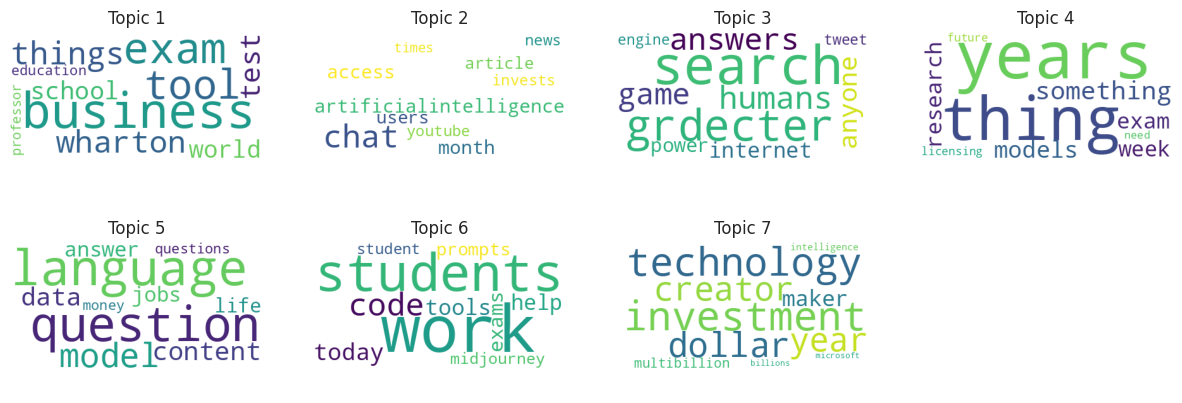

In [ ]:
#Converting our Probabilities into word count over each document (Code Refrenced from Chatgpt)
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = pyplot.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)

    Word_Frequency = dict(count_dict[0:10])
    # generating word cloud
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)

    subfig_Row = math.floor(topic_idx/4)
    subfig_Col = math.ceil(topic_idx%4)
    ax[subfig_Row,subfig_Col].imshow(wordcloud)
    ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1))
plt.show()

In [ ]:
TopicDis_Doc = lda.transform(ReducedCount) #This adds upto 1 and this gives us probabilities of each topic occuring in the document which is fairly normal

#Computing overall topic distribution for all each documents
Overall_Topic_Dis = sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))
Overall_Topic_Dis

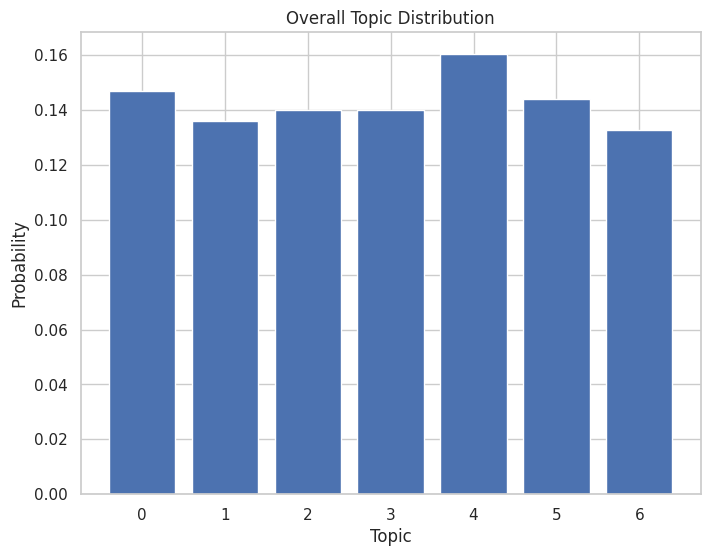

In [ ]:
# Plotting the distributiion of Topics in the document
plt.figure(figsize=(8, 6))
plt.bar(range(len(Overall_Topic_Dis)), Overall_Topic_Dis)
plt.title('Overall Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.xticks(range(len(Overall_Topic_Dis)))
plt.show()

In [ ]:
# Viewing full Topic Probabilities by Document Matrix
TopicDis_Doc = lda.transform(ReducedCount)
df_document_topics = pd.DataFrame(TopicDis_Doc)
df_document_topics

Topic Probablity distribution by Document: 
 [[0.04810986 0.04761905 0.04763941 0.04761905 0.04765695 0.71373663
  0.04761905]
 [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
  0.14285714]
 [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
  0.14285714]
 [0.02857144 0.18570733 0.02857259 0.0286093  0.33960983 0.36035805
  0.02857145]
 [0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.71428571
  0.04761905]]


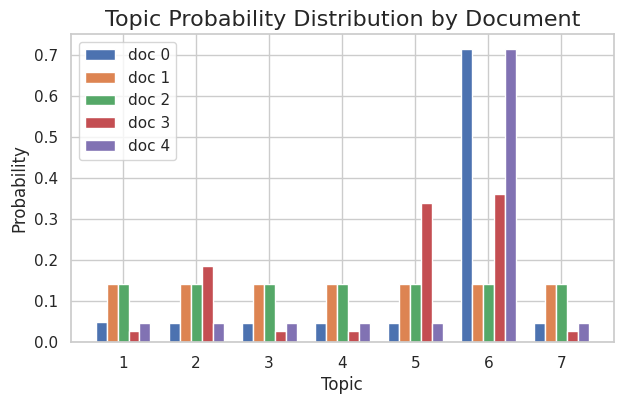

In [ ]:
#This code shows us the probability of each topic within our 5 documents
TopicDis_Doc = TopicDis_Doc[0:5]
print('Topic Probablity distribution by Document: \n', TopicDis_Doc)
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

pyplot.figure(figsize=(7,4))
pyplot.title('Topic Probability Distribution by Document', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15
for i in range(0,5):
    pyplot.bar(Bar_index + i*width, TopicDis_Doc[i].tolist(), width,  label='doc ' + str(i))

pyplot.xticks(Bar_index + 2*width, Bar_index)
pyplot.legend()
pyplot.show();


### References:

The Year in Review: 2023’s Most Notable in Tech from OpenAI, Microsoft, and Google. (n.d.). Www.linkedin.com. Retrieved April 8, 2024, from https://www.linkedin.com/pulse/year-review-2023s-most-notable-tech-from-openai-microsoft-terzic-eo4mf
‌

Medium (2018, August 10). Exploring out-of-the-box Sentiment Analysis Packages. Medium. https://medium.com/@10e/exploring-out-of-the-box-sentiment-analysis-packages-8cb9931ff5a4
‌

AI Passes U.S. Medical Licensing Exam. (2023, January 19). Www.medpagetoday.com. https://www.medpagetoday.com/special-reports/exclusives/102705
‌

Codes which are refrenced from ChatGPT.
https://chat.openai.com/